In [1]:
import pickle
import numpy as np
import pandas as pd
from time import time
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

In [2]:
with open('DataWrangling/df_features_train.pickle', 'rb') as f:
    df_train = pickle.load(f)

df_train.head()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,contrast_chroma_3,contrast_chroma_4,contrast_chroma_5,contrast_chroma_6,contrast_chroma_7,contrast_chroma_8,contrast_chroma_9,contrast_chroma_10,contrast_chroma_11,targets
bass_electronic_016-038-100,0,-479.411530,98.190964,73.860405,60.657932,44.650040,31.812342,20.422415,11.633040,4.483364,...,0.100823,0.077063,0.004940,0.018494,0.021830,0.022769,0.441086,0.035009,0.064928,0
bass_synthetic_007-027-075,1,-166.268250,146.527054,-31.666693,50.507637,-16.867277,27.238642,-8.456425,11.823599,-0.127306,...,0.692862,0.414557,0.186671,0.061465,0.100212,0.037032,0.039591,0.201869,0.037835,0
bass_synthetic_006-021-050,1,-213.107101,167.176712,-44.019485,17.541468,9.643226,29.337196,13.834208,-9.782898,3.636604,...,0.033515,0.443627,0.050289,0.008397,0.022315,0.145868,0.664046,0.126105,0.035491,0
bass_synthetic_091-062-127,1,-347.146729,-13.595598,-35.166660,47.704960,-53.333206,22.225166,-34.431053,-6.403897,-16.073690,...,0.021351,0.009298,0.057064,0.128558,0.006207,0.047093,0.405889,0.038795,0.079125,0
bass_synthetic_040-094-100,0,-526.400574,14.516660,-14.431670,16.077568,-14.620026,10.980522,-5.744015,6.648300,-6.725354,...,0.187832,0.167768,0.165274,0.180266,0.151736,0.186780,0.139803,0.205987,0.214088,0


In [3]:
df_train.shape

(50000, 167)

In [4]:
with open('DataWrangling/df_features_test.pickle', 'rb') as f:
    df_test = pickle.load(f)

df_test.head()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,contrast_chroma_3,contrast_chroma_4,contrast_chroma_5,contrast_chroma_6,contrast_chroma_7,contrast_chroma_8,contrast_chroma_9,contrast_chroma_10,contrast_chroma_11,targets
bass_synthetic_068-049-025,1,-522.865784,46.664146,34.379799,24.787592,17.420424,10.198802,4.609534,1.380598,-1.023342,...,0.034056,0.035498,0.025267,0.019353,0.038954,0.092328,0.087519,0.061090,0.091117,0
keyboard_electronic_001-021-127,0,-444.647125,193.894592,27.295811,-3.687870,6.295289,8.091360,10.286986,6.085114,2.499446,...,0.392218,0.563529,0.143236,0.164834,0.211634,0.353580,0.422365,0.019230,0.009007,4
guitar_acoustic_010-066-100,0,-439.374725,59.548592,2.893683,-12.038996,-12.553400,-11.452487,-12.534291,-20.458334,-19.255125,...,0.072573,0.091863,0.090990,0.840737,0.093613,0.048391,0.030883,0.015003,0.009667,3
reed_acoustic_037-068-127,1,-374.560974,70.889236,-41.184624,-20.965775,-50.554077,-16.927151,-28.767248,-18.298323,-15.653652,...,0.366166,0.036109,0.006731,0.023056,0.020713,0.885966,0.061736,0.016221,0.002263,7
flute_acoustic_002-077-100,1,-365.428162,13.425872,-43.518299,20.321766,-29.725790,-21.518469,-17.812229,-10.225934,8.543967,...,0.037789,0.052419,0.910790,0.022027,0.030132,0.009579,0.028886,0.048302,0.016970,2


In [5]:
#get training and testing data
X_train = df_train.drop(labels=['targets'], axis=1)
y_train = df_train['targets']

X_test = df_test.drop(labels=['targets'], axis=1)
y_test = df_test['targets']

# Naive Bayes

In [6]:
#instantiate the classifier
clf_NB = GaussianNB()

#fit to training data
clf_NB.fit(X_train, y_train)

GaussianNB()

In [7]:
y_pred_NB = clf_NB.predict(X_test)

In [8]:
accuracy_NB = np.mean(y_pred_NB == y_test)
print("The accuracy of Naive Bayes is {0:.2%}".format(accuracy_NB))

The accuracy of Naive Bayes is 12.28%


In [9]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    #fig.tight_layout()
    return ax

In [10]:
class_names=np.array(['bass', 'brass', 'flute', 'guitar', 
             'keyboard', 'mallet', 'organ', 'reed', 
             'string', 'synth_lead', 'vocal'])

Normalized confusion matrix
[[0.00948992 0.03202847 0.         0.01779359 0.25978648 0.04389087
  0.         0.02016607 0.58244365 0.03440095]
 [0.01486989 0.26022305 0.         0.0260223  0.01858736 0.18587361
  0.01486989 0.01858736 0.39033457 0.07063197]
 [0.01111111 0.25       0.11111111 0.00555556 0.20555556 0.02777778
  0.02777778 0.07222222 0.28888889 0.        ]
 [0.         0.16717791 0.01380368 0.00153374 0.09815951 0.02453988
  0.00613497 0.01840491 0.6702454  0.        ]
 [0.         0.10052219 0.         0.00522193 0.04046997 0.01436031
  0.         0.00391645 0.83550914 0.        ]
 [0.         0.02970297 0.         0.         0.04455446 0.
  0.00990099 0.         0.9009901  0.01485149]
 [0.01593625 0.4063745  0.06573705 0.03585657 0.12151394 0.01195219
  0.10358566 0.03386454 0.17131474 0.03386454]
 [0.         0.43404255 0.01702128 0.00851064 0.00425532 0.
  0.01702128 0.00425532 0.51489362 0.        ]
 [0.         0.08496732 0.         0.00326797 0.04248366 0.0130719
 

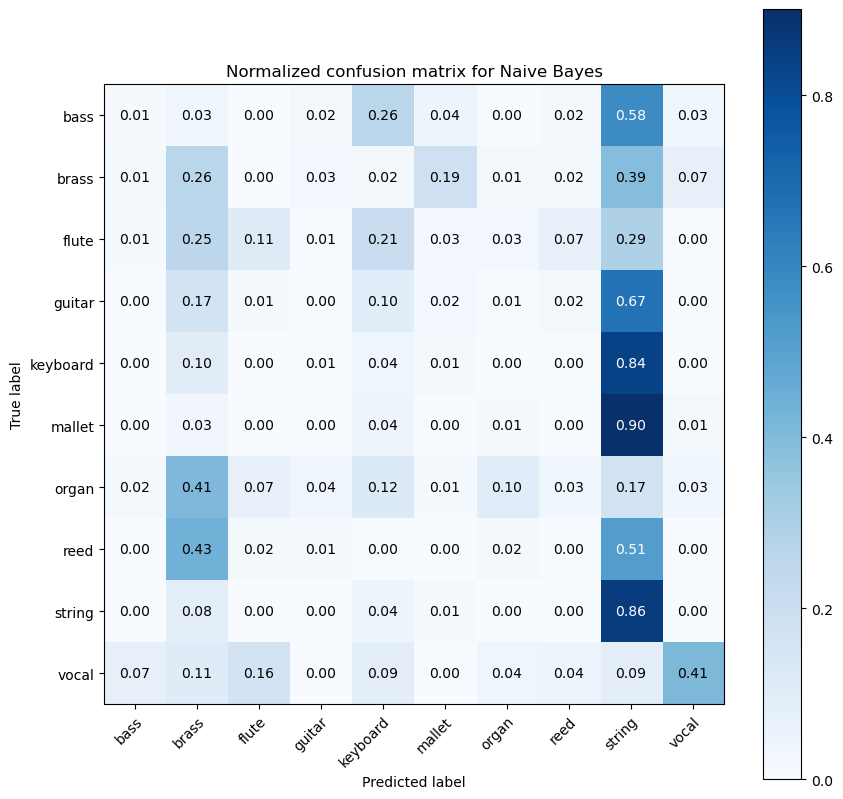

In [11]:
plot_confusion_matrix(y_test, y_pred_NB, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for Naive Bayes')
plt.savefig('ConfusionMatrix/NB_normalized.png')

# Random Forests

In [12]:
#instantiate the random forest
clf_Rf =RandomForestClassifier(n_estimators=20, max_depth=50, warm_start=True)

In [13]:
clf_Rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, n_estimators=20, warm_start=True)

In [14]:
y_pred_RF = clf_Rf.predict(X_test)

In [15]:
accuracy_RF = np.mean(y_pred_RF == y_test)
print("The accuracy of Random Forest is {0:.2%}".format(accuracy_RF))

The accuracy of Random Forest is 57.15%


Normalized confusion matrix
[[0.62752076 0.00118624 0.00118624 0.0747331  0.11032028 0.16607355
  0.01542112 0.         0.00118624 0.00237248]
 [0.01858736 0.65427509 0.02973978 0.04089219 0.01858736 0.00371747
  0.00371747 0.04089219 0.         0.18959108]
 [0.05       0.         0.72777778 0.00555556 0.00555556 0.06666667
  0.03333333 0.03888889 0.         0.07222222]
 [0.20552147 0.00613497 0.0107362  0.48312883 0.21165644 0.05981595
  0.01687117 0.00460123 0.00153374 0.        ]
 [0.19060052 0.02219321 0.00913838 0.18407311 0.49347258 0.04699739
  0.02088773 0.00130548 0.02088773 0.01044386]
 [0.11881188 0.0049505  0.00990099 0.1039604  0.18316832 0.55940594
  0.0049505  0.         0.01485149 0.        ]
 [0.11752988 0.02191235 0.03984064 0.         0.03386454 0.02988048
  0.5876494  0.05976096 0.02788845 0.08167331]
 [0.05957447 0.26382979 0.10212766 0.08085106 0.00425532 0.00425532
  0.00425532 0.31914894 0.14468085 0.01702128]
 [0.09803922 0.00980392 0.         0.04248366 0.0228

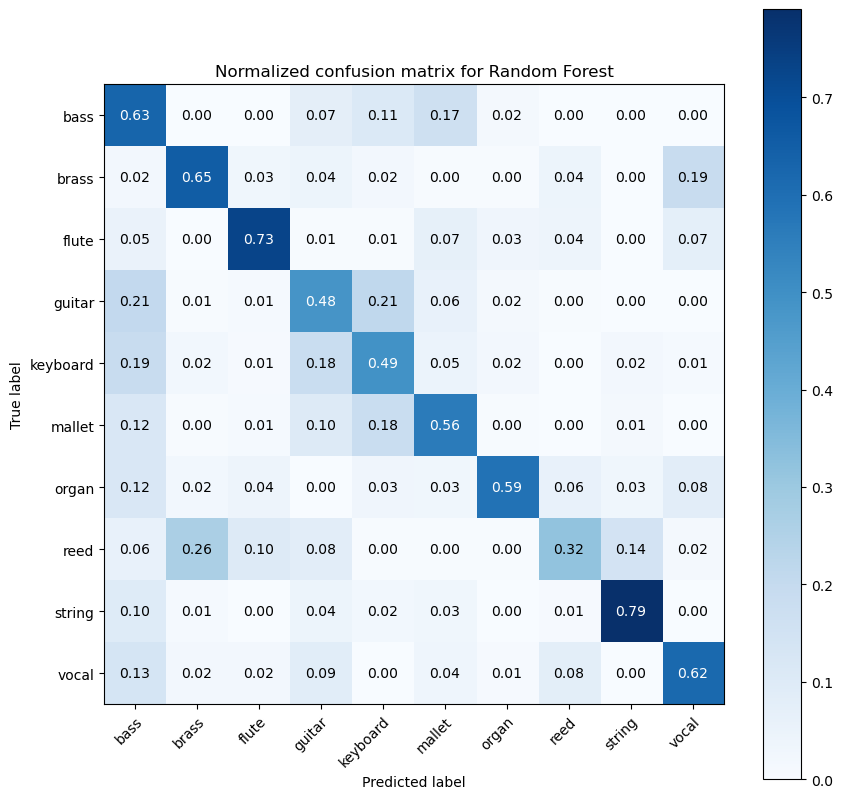

In [16]:
plot_confusion_matrix(y_test, y_pred_RF, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for Random Forest')
plt.savefig('ConfusionMatrix/RF_Normalized.png')

## Grid Search

In [17]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [18]:
param_dist = {"n_estimators" : [20, 40, 60, 80],
              "max_depth": [10, 20, 30, 40],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [19]:
#instantiate a new random forest
clf_RF_CV=RandomForestClassifier()

#set number of iterations
n_iter_search = 20
#creat the random search class
random_search_RF = RandomizedSearchCV(clf_RF_CV, param_distributions=param_dist,
                                      n_iter=n_iter_search, cv=5)
#
random_search_RF.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x137865820>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x137a455e0>,
                                        'n_estimators': [20, 40, 60, 80]})

In [20]:
y_pred_RF_random = random_search_RF.predict(X_test)
accuracy_RF_random = np.mean(y_pred_RF_random == y_test)
print("The accuracy of Random Forest is {0:.2%}".format(accuracy_RF_random))

The accuracy of Random Forest is 61.13%


Normalized confusion matrix
[[0.6168446  0.         0.         0.05575326 0.10913405 0.19810202
  0.01067616 0.00948992 0.         0.        ]
 [0.0260223  0.69516729 0.02230483 0.03345725 0.01858736 0.
  0.         0.03717472 0.00371747 0.16356877]
 [0.05555556 0.00555556 0.73333333 0.         0.01666667 0.03333333
  0.02777778 0.08888889 0.         0.03888889]
 [0.13957055 0.00306748 0.00460123 0.54601227 0.24079755 0.0506135
  0.01380368 0.00153374 0.         0.        ]
 [0.13446475 0.01174935 0.00391645 0.2232376  0.56527415 0.03133159
  0.01436031 0.         0.00522193 0.01044386]
 [0.1039604  0.         0.         0.03960396 0.24752475 0.5990099
  0.0049505  0.         0.0049505  0.        ]
 [0.07968127 0.01195219 0.0498008  0.00398406 0.03984064 0.04780876
  0.57768924 0.05776892 0.03386454 0.09760956]
 [0.         0.28510638 0.10212766 0.09787234 0.00851064 0.
  0.         0.38723404 0.10638298 0.01276596]
 [0.03594771 0.         0.00326797 0.02614379 0.00326797 0.00980392
  

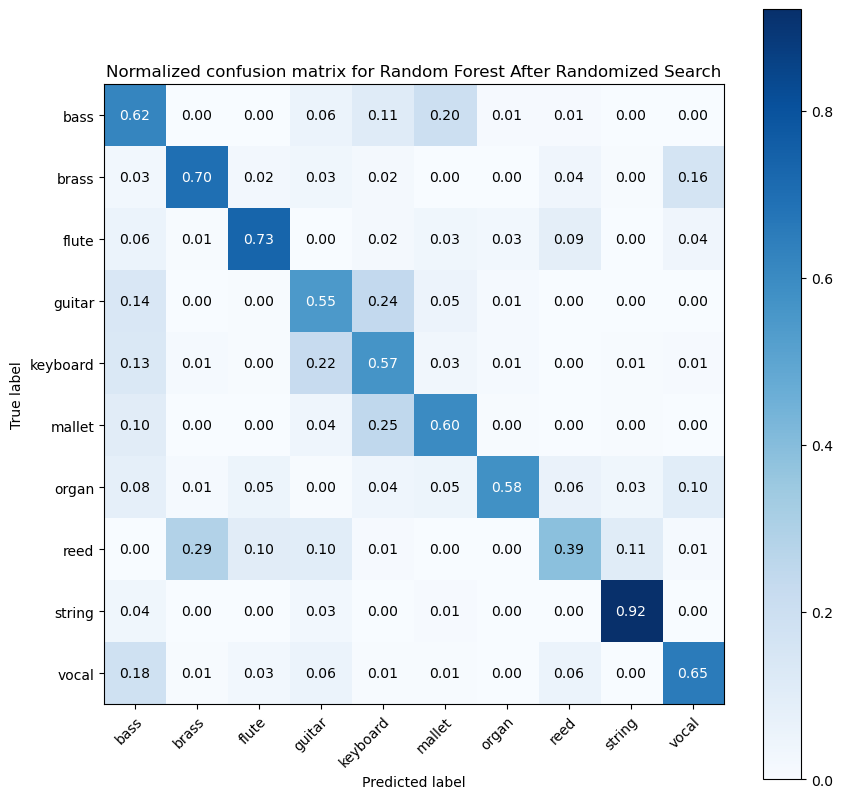

In [21]:
plot_confusion_matrix(y_test, y_pred_RF_random, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for Random Forest After Randomized Search')
plt.savefig('ConfusionMatrix/RF_Normalized_RandomSearch.png')

In [22]:
random_search_RF.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=40,
                       max_features=8, min_samples_split=3, n_estimators=80)

In [24]:
# pickle the trained model
with open("SavedModels/random_search_RF.pickle", mode='wb') as file:
    pickle.dump(random_search_RF, file)

# SVM

In [25]:
#instantiate the sclaer
scaler = MinMaxScaler()

In [26]:
#scale the feature space
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

In [27]:
#instatiate the  classifier
clf_svm = SVC(C=0.1)

In [28]:
clf_svm.fit(X_train_scale, y_train)

SVC(C=0.1)

In [29]:
y_pred_svm = clf_svm.predict(X_test)
accuracy_svm = np.mean(y_pred_svm == y_test)
print("The accuracy of SVMs is {0:.2%}".format(accuracy_svm))

/Users/mariechu/opt/anaconda3/envs/music/lib/python3.9/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


The accuracy of SVMs is 3.44%


In [30]:
#display non normalized confusion matrix
confusion_matrix(y_test, y_pred_svm)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0, 843],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 269],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 180],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 652],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 766],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 202],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 502],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 235],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 306],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 141]])

Normalized confusion matrix
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


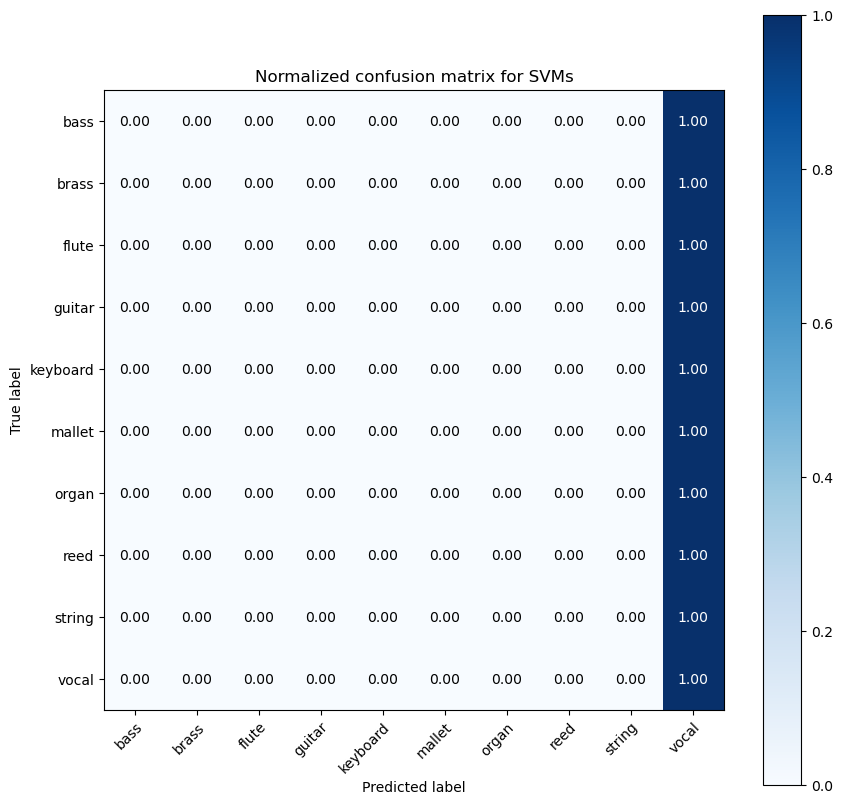

In [31]:
plot_confusion_matrix(y_test, y_pred_svm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for SVMs')
plt.savefig('ConfusionMatrix/SVM_Normalized.png')